# Introduction

This project looks to wrangle data WeRateDogs Twitter data to ready it for trustworthy analyses and visualisation. Using Python and its libraries, this notebook will look to gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. 

The 3 data sources that will be gathered in this project will be importing a local CSV file via Pandas, requesting a TSV file, which is hosted on Udacity's servers and finally querying data from Twitter, via Twitters API and the Tweepy Library.


In [1]:
import pandas as pd 
import numpy as np
import os 
import requests
import tweepy
import time
import json
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

# 1. Gathering
The first stop on our data wrangling journey, is gathering. Here, we will look to gather our 3 sources of data, via the different methods previously mentioned.  

### Manually Reading Local File

In [2]:
# reading in the twitter-archive-enhanced.csv file 
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

### Requesting Hosted File

In [3]:
# requesting the hosted 'image_predictions.tsv'
url ='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

r = requests.get(url)
r.status_code

200

In [4]:
# open the request content into 'image_predictions.tsv'
with open(os.path.join('image_predictions.tsv'), mode='wb') as file:
    file.write(r.content)

df_image = pd.read_csv('image_predictions.tsv', sep='\t')

### API 

In [5]:
df_archive['tweet_id']

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
               ...        
2351    666049248165822465
2352    666044226329800704
2353    666033412701032449
2354    666029285002620928
2355    666020888022790149
Name: tweet_id, Length: 2356, dtype: int64

In [6]:
# Generating API 
consumer_key = 'consumer_key'
consumer_secret = 'consumer_secret'
access_token = 'access_token'
access_secret = 'access_secret'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [7]:
# query through the tweet ids in existing df_archive and write to JSON file

# with open('tweet_json.txt','w') as json_file:
#     start = time.time()
#     for tweet_id in df_archive['tweet_id']:
#             try: 
#                 status = api.get_status(tweet_id)
#                 tweet = json.dumps(status._json)
#                 end = time.time()
#                 print("time taken: {}s".format(end-start))
#                 json_file.write(tweet + "\n")
#             except:
#                 continue

In [8]:
# writing the tweet_id, facourites count and retweet cound from the json.txt file

with open('tweet_json.txt') as file:
    df_info = pd.DataFrame(columns = ["tweet_id", "favorites", "retweets"])
    
    for i in file:
        info = json.loads(i)
        row = {'tweet_id':info['id'], 'favorites':info['favorite_count'], 'retweets':info['retweet_count']}
        series = pd.Series(row)
        df_info = df_info.append(row, ignore_index=True)

# 2. Assessing 

Next, we will look into each dataset to assess, the quality and tidiness of the data available; listing the issues found in the respective dataset. 
## 2.1. twitter-archive-enhanced.csv


In [9]:
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


From the above, it seems there are multiple columns, listing a description of dogs ("doggo', "floofer", "pupper' and 'puppo"). These columns may be better off represented by a single column.

In [10]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

From the df_archive info above: 
* There are retweets and replies present within our dataset
* The expanded_urls has missing  values
* tweet_id is a int and should be a string
* The dog type data, "doggo" "floofer" "pupper" and "puppo",  are strings and not categorical datatype
* Timestamp is a string instead of datetime object

In [11]:
sum(df_archive['tweet_id'].duplicated())

0

* Thankfully, it seems there are no duplicated entries

In [12]:
df_archive['rating_numerator'].unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

In [13]:
df_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

It seems that most of the ratings are 14 and below, the outlying values may be a due to errors when gathering the data programmatically 
* rating_numerators abnormal values


In [14]:
df_archive['rating_denominator'].unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [15]:
df_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [16]:
df_archive['rating_denominator'].describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

It seems likely that the denominator for the rating system is supposed to be 10. It is possible that the other values may be due to errors when the data was extracted from the text.  Lets investigate a little more.

In [17]:
df_archive.query("rating_denominator != 10")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


It seems that some of the rating_denominator inconsistencies may be due to retweets and replies, as well as group rating of multiple dogs in a photo.
* rating_denominators abnormal values

In [18]:
df_archive["name"].value_counts().head(20)

None       745
a           55
Charlie     12
Cooper      11
Oliver      11
Lucy        11
Tucker      10
Penny       10
Lola        10
Winston      9
Bo           9
Sadie        8
the          8
Bailey       7
Buddy        7
an           7
Toby         7
Daisy        7
Jax          6
Oscar        6
Name: name, dtype: int64

In [19]:
df_archive["name"].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

From the above value count: 
* "none" appears as the most common name, but it is not a NaN value
* There seem to be incorrect names recorded such as 'a', 'the', 'and', ect.


### df_archive issues: 

**Data quality issues:**
* There are retweets and replies present within our dataset
* The expanded_urls has missing values
* The dog type data, "doggo" "floofer" "pupper" and "puppo"  are strings and not categorical datatype
* tweet_id in df_archive is an int and should be a string
* Timestamp is a string instead of datetime object
* rating_numerators abnormal values
* rating_denominator abnormal values
* Rating_denominator inconsistency
* invalid name such as 'none', 'a', 'the', 'and' are present

**Data tidiness issues:**
* Dog types, "doggo" "floofer" "pupper" and "puppo" can be one "dog_catagory" column


## 2.2 image_predictions.tsv
Next, we will assess the image_predictions.tsv file for data quality and tidiness issues:


In [20]:
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [21]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


From the above, as tweet_id is the last part of a tweet URL, it should be stored as a string instead of an int

In [22]:
len(df_image['p1'].unique())

378

In [23]:
df_image['p1'].unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
       'miniature_poodle', 'golden_retriever', 'Gordon_setter',
       'Walker_hound', 'pug', 'bloodhound', 'Lhasa', 'English_setter',
       'hen', 'desktop_computer', 'Italian_greyhound', 'Maltese_dog',
       'three-toed_sloth', 'ox', 'malamute', 'guinea_pig',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama',
       'Chesapeake_Bay_retriever', 'curly-coated_retriever', 'dalmatian',
       'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'seat_belt',
       'snail', 'miniature_schnauzer', 'Airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 't

Seems that there are quite a few dog breeds recorded in the dataframe. So, we might not want to use categorical data for the breeds.

In [24]:
(df_image['p1_conf'] < df_image['p2_conf']).sum()

0

In [25]:
(df_image['p2_conf'] < df_image['p3_conf']).sum()

0

There are also no errors in the prediction data, with p1 having the highest probability followed by p2 and p3. 

### df_image issues: 

**Data quality issues:**
* tweet_id is the last part of a tweet URL, it should be stored as a string instead of a int datatype


## 2.3. json_tweet.txt

In [26]:
df_info.head()

,tweet_id,favorites,retweets
0,892420643555336193,34865,7319
1,892177421306343426,30198,5467
2,891815181378084864,22729,3610
3,891689557279858688,38111,7506
4,891327558926688256,36378,8066


In [27]:
df_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   2331 non-null   object
 1   favorites  2331 non-null   object
 2   retweets   2331 non-null   object
dtypes: object(3)
memory usage: 54.8+ KB


From the above: 
* favorites is a string and should be an int
* retweets is a string and should be an int

In [28]:
df_info.duplicated().sum()

0

### df_info issues: 

**Data quality issues:**
* favorites is a string and should be an int
* retweets is a string and should be an int

## 2.4 Data issue summary

Below is a summary of the list of issues that we will be cleaning

**Data quality issues:**
* There are retweets and replies present within our dataset
* The expanded_urls has missing  values
* The dog type data, "doggo" "floofer" "pupper" and "puppo"  are strings and not categorical datatype
* tweet_id in df_archive is an int and should be a string
* Timestamp is a string instead of datetime object
* rating_numerators abnormal values
* rating_denominator abnormal values
* invalid name such as'none', 'a', 'the', 'and' are present
* tweet_id in df_image is an int and should be a string
* Favorites in df_info is a string and should be an int
* Retweets in df_info is a string and should be an int

**Data tidyness issues:**
* Dog types, "doggo" "floofer" "pupper" and "puppo" can be one "dog_catagory" column
* Currently, the data is stored in 3 different DataFrames, instead of a single DataFrame


# 3. Cleaning

Before we start cleaning the issues identified above, we will create a copy of each DataFame, in which we will perform the data cleaning 

In [29]:
# Creating a copy of df_archive
df_archive_copy = df_archive

# Creating a copy of df_archive
df_image_copy = df_image

# Creating a copy of df_archive
df_info_copy = df_info

Next, we will proceed with cleaning the issues identified, starting with the df_archive.

**Issue:**  There are retweets and replies present within our dataset 


**Define:** We will simply remove the unwanted rows, by using the query function to select rows with favourites and retweets, we excluding them when reassigning the DataFrame. 
After removing the retweet and replies data from the DataFrame, we will drop the empty columns.


In [30]:
# removing replys 
df_archive_copy = df_archive_copy.query("in_reply_to_status_id == 'NaN'")
 
# querying and removing retweets
df_archive_copy = df_archive_copy.query("retweeted_status_id == 'NaN'")

In [31]:
#dropping the now empty retweet and replies related columns
df_archive_copy.dropna(how='all', axis=1, inplace=True)

**Test :**

In [32]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


***

**Issue:** The expanded_urls has missing  values

**Define:** Fill the missing values based on the "https://twitter.com/dog_rates/status/" + 'tweet_id' + "/photo/1" using fillna()

In [33]:
url_fill = "https://twitter.com/dog_rates/status/" + str(df_archive_copy['tweet_id']) + "/photo/1"
df_archive_copy['expanded_urls'].fillna(value = url_fill, inplace=True)

**Test :**

In [34]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2097 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


***

**Issue:**  Timestamp is a string instead of datetime object


**Define:** We will change the data types for these 4 columns by using 'pd.to_datetime' 



In [35]:
df_archive_copy['timestamp'] = pd.to_datetime(df_archive_copy['timestamp'])


**Test:**

In [36]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2097 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

In [37]:
df_archive_copy.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


***

**Issue:** Rating_numerator abnormal values

**Define:** Replace all rating_numerator values larger than 14, with the average rating_numerator by applying .mean()


In [38]:
# Ensuring the rating numerator has been accurately extracted from text 

rating = df_archive_copy.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
rating.columns = ['rating_numerator', 'rating_denominator']

#replaceing all numerator values greater than 14 with the mean rating
for row in df_archive_copy['rating_numerator'].items():
    if row[1] > 14:
        df_archive_copy['rating_numerator'][row[0]] = round(df_archive_copy['rating_numerator'].mean())

<ipython-input-38-b8fa9e7caf43>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_archive_copy['rating_numerator'][row[0]] = round(df_archive_copy['rating_numerator'].mean())


**Test:**

In [39]:
df_archive_copy['rating_numerator'].value_counts()

12    492
10    436
11    425
13    287
9     153
8      98
7      52
14     38
5      34
6      32
3      19
4      16
2       9
1       5
0       1
Name: rating_numerator, dtype: int64

**Issue:** rating_denominator abnormal values

**Define:** Assign 10 to all the rating_denominator values


In [40]:
df_archive_copy['rating_denominator'] = 10

**Test:** 

In [41]:
df_archive_copy['rating_denominator'].value_counts()

10    2097
Name: rating_denominator, dtype: int64

**Issue:** in df_archive["name"] invalid name such as'none', 'a', 'the', 'and' are present

**Define:** Assuming all dog names start with a capital letter, use islower() to identify and remove invalid names



In [42]:
df_archive_copy.loc[df_archive_copy['name'].str.islower(), 'name'] = None

In [43]:
df_archive_copy['name'].value_counts()

None       603
Charlie     11
Lucy        11
Cooper      10
Oliver      10
          ... 
Fynn         1
Nollie       1
Zeek         1
Luther       1
Karma        1
Name: name, Length: 930, dtype: int64

***

**Issue:** tweet_id in df_archive is an int and should be a string

**Define:** Use .astype() to change the datatype from int to str

In [44]:
df_archive_copy['tweet_id'] = df_archive_copy['tweet_id'].astype('str')

**Test:**

In [45]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2097 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                1993 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

Finally, we will save the new data frame to as a csv file

**Issue:** Dog types, "doggo" "floofer" "pupper" and "puppo" can be one "dog_catagory" column

**Define:** Concatnate the 4 dog category columns into a single string under a new columns 'category'. Next, create a new "dog_category" columns. use .loc to identify which rows contains each dog type and assign the value to dog_category column

In [46]:
# replaceing all the 'None'
df_archive_copy['doggo'].replace('None', '', inplace=True)
df_archive_copy['floofer'].replace('None', '', inplace=True)
df_archive_copy['pupper'].replace('None', '', inplace=True)
df_archive_copy['puppo'].replace('None', '', inplace=True)

# string-ing together the 4 dog categories into a single column
df_archive_copy['category'] = df_archive_copy['doggo'] + df_archive_copy['floofer'] + df_archive_copy['pupper'] + df_archive_copy['puppo']

# check for multiple entries with multiple categories 
df_archive_copy['category'].value_counts()

                1761
pupper           221
doggo             72
puppo             23
floofer            9
doggopupper        9
doggofloofer       1
doggopuppo         1
Name: category, dtype: int64

In [47]:
# Assigning dogs with multiple caategories as multiple
df_archive_copy.loc[df_archive_copy['category'] == 'doggopupper', 'dog_category'] = 'multiple'
df_archive_copy.loc[df_archive_copy['category'] == 'doggofloofer', 'dog_category'] = 'multiple'
df_archive_copy.loc[df_archive_copy['category'] == 'doggopuppo', 'dog_category'] = 'multiple'

# Assigning 'None' for those with no categories 
df_archive_copy.loc[df_archive_copy['category'] == '', 'dog_category'] = 'none'

# Assigning category to dog_category column
df_archive_copy.loc[df_archive_copy['category'] == 'doggo', 'dog_category'] = 'doggo'
df_archive_copy.loc[df_archive_copy['category'] == 'floofer', 'dog_category'] = 'floofer'
df_archive_copy.loc[df_archive_copy['category'] == 'pupper', 'dog_category'] = 'pupper'
df_archive_copy.loc[df_archive_copy['category'] == 'puppo', 'dog_category'] = 'puppo'


**Test:**

In [48]:
df_archive_copy['dog_category'].value_counts()

none        1761
pupper       221
doggo         72
puppo         23
multiple      11
floofer        9
Name: dog_category, dtype: int64

***

**Issue:**  The dog type data, "doggo" "floofer" "pupper" and "puppo",  are strings and not categorical datatype


**Define:** As we have merged the relevant info into the dog_category columns, we will drop the previous rows using .drop() and convert dog_category to 'category' data type using .astype


In [49]:
# dropping the redundent columns 
df_archive_copy.drop(columns=['doggo','floofer','pupper','puppo'], inplace=True)

# changing the category of dog_category to category
df_archive_copy['dog_category'] = df_archive_copy['dog_category'].astype('category')

In [50]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2097 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                1993 non-null   object             
 8   category            2097 non-null   object             
 9   dog_category        2097 non-null   category           
dtypes: category(1), datetime64[ns, UTC](1), int64(2), object(6)
memory usage: 246.1+ KB


***

Next, we will clean the df_image DataFrame.

**Issue:** tweet_id in df_image is a int and should be a string

**Define:** use .astype to change the data type from an int to a string

In [51]:
df_image_copy['tweet_id'] = df_image_copy['tweet_id'].astype('str')

**Test:**

In [52]:
df_image.dtypes

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

Finally, we will clean the df_info DataFrame.

**Issue:** tweet_id should be a string, favorites and rewteets are strings and should be ints

**Define:** use .astype to change the data type to their respective data types


In [53]:
#converting tweet_id into a string 
df_info_copy['tweet_id'] = df_info_copy['tweet_id'].astype('str')     

# converting favorites into int
df_info_copy['favorites'] = df_info_copy['favorites'].astype('int')

# converting retweets into int
df_info_copy['retweets'] = df_info_copy['retweets'].astype('int')

**Test:**

In [54]:
df_info_copy.dtypes

tweet_id     object
favorites     int32
retweets      int32
dtype: object

***

To round up the data cleaning, we will merge the 3 DataFrames into a single master DataFrame.

**Issue:**  The data is stored in 3 different DataFrames, instead of a single DataFrame

**Define:** use .merge() to merge the 3 DataFrames into a single 'twitter_archive_master' DataFrame

In [55]:
twitter_archive_master = df_archive_copy.merge(df_image_copy, how='left', on='tweet_id' ) 
twitter_archive_master = twitter_archive_master.merge(df_info_copy, how='left', on='tweet_id')

In [56]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2097 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                1993 non-null   object             
 8   category            2097 non-null   object             
 9   dog_category        2097 non-null   category           
 10  jpg_url             1971 non-null   object             
 11  img_num             1971 non-null   float64            
 12  p1                  1971 non-null 

In [57]:
twitter_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,category,dog_category,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,none,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,34865.0,7319.0
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,none,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,30198.0,5467.0
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,none,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,22729.0,3610.0
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,none,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,38111.0,7506.0
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,none,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,36378.0,8066.0


***
**Issue:**  There are some empty values across the DataFrame

**Define:** We will use .dropna() to drop the empty values

In [58]:
twitter_archive_master.dropna(inplace=True)

**Test:**

In [59]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1866 entries, 0 to 2096
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1866 non-null   object             
 1   timestamp           1866 non-null   datetime64[ns, UTC]
 2   source              1866 non-null   object             
 3   text                1866 non-null   object             
 4   expanded_urls       1866 non-null   object             
 5   rating_numerator    1866 non-null   int64              
 6   rating_denominator  1866 non-null   int64              
 7   name                1866 non-null   object             
 8   category            1866 non-null   object             
 9   dog_category        1866 non-null   category           
 10  jpg_url             1866 non-null   object             
 11  img_num             1866 non-null   float64            
 12  p1                  1866 non-null 

## Storing the DataFrame as CSV 

In [60]:
twitter_archive_master.to_csv("twitter_archive_master.csv")

In [61]:
twitter_archive_master.rating_numerator.unique()

array([13, 12, 14,  5, 11,  6, 10,  0,  3,  7,  8,  9,  4,  2,  1],
      dtype=int64)

***
## Analysis

Now that the Dataframe has been wrangled, let's take explore the data to gather some insights. 

#### Question 1:  What is the most popular dog category featured on WeRateDogs?

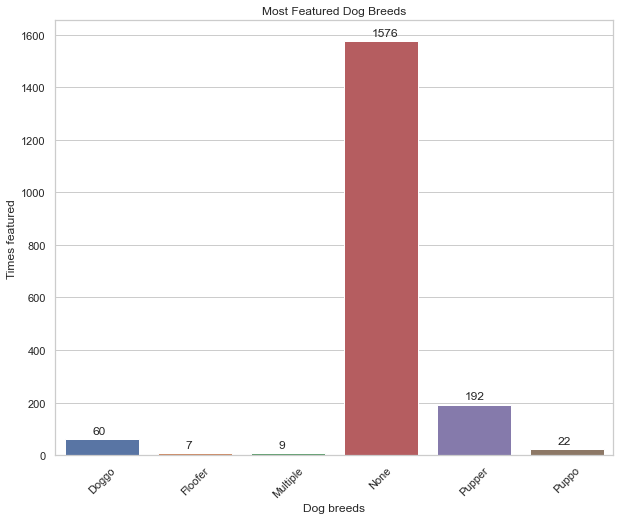

In [89]:
sns.set_theme(style="whitegrid")

plt.subplots(figsize=(10,8))
ax = sns.countplot(data=twitter_archive_master, x='dog_category' )

for i in ax.patches:
        ax.annotate('{:}'.format(i.get_height()), (i.get_x()+0.3, i.get_height()+20))

ax.set_xticklabels(['Doggo', 'Floofer', 'Multiple', 'None', 'Pupper', 'Puppo'])
plt.title('Most Featured Dog Breeds')
plt.xlabel('Dog breeds')
plt.ylabel('Times featured')
plt.xticks(rotation=45);

From the bar chart above, we can see that the majority of the dogs, are not categorised. For the dogs that are categorised, pupper is the most common dog type, followed by doggo, puppo, dogs with multiple ratings and lastly floofer.

***
#### Question 2:  Across the dog categories, which categorys is the highest rated?


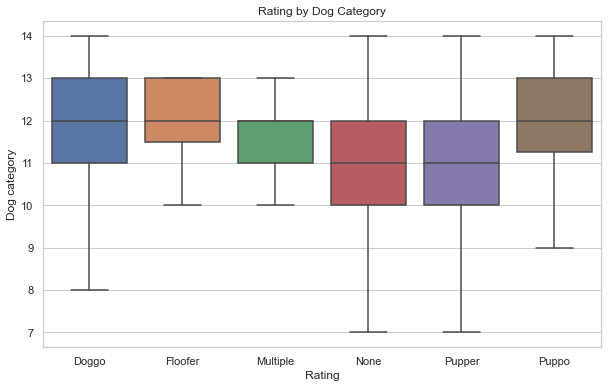

In [93]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(data=twitter_archive_master, x='dog_category', y='rating_numerator', showfliers=False)

ax.set_xticklabels(['Doggo', 'Floofer', 'Multiple', 'None', 'Pupper', 'Puppo'])
plt.title('Rating by Dog Category')
plt.xlabel('Rating')
plt.ylabel('Dog category');


From the boxplot above, we can see that Doggo, Floofer and Puppo have a median rating of 12, and similar distribution. Both, uncategorised dogs, dogs with multiple categories and Puppers have the same rating distribution, with a median rating of 11.
***
#### Question 3:  Across the dog categories, which categories is the most favorited and retweeted?


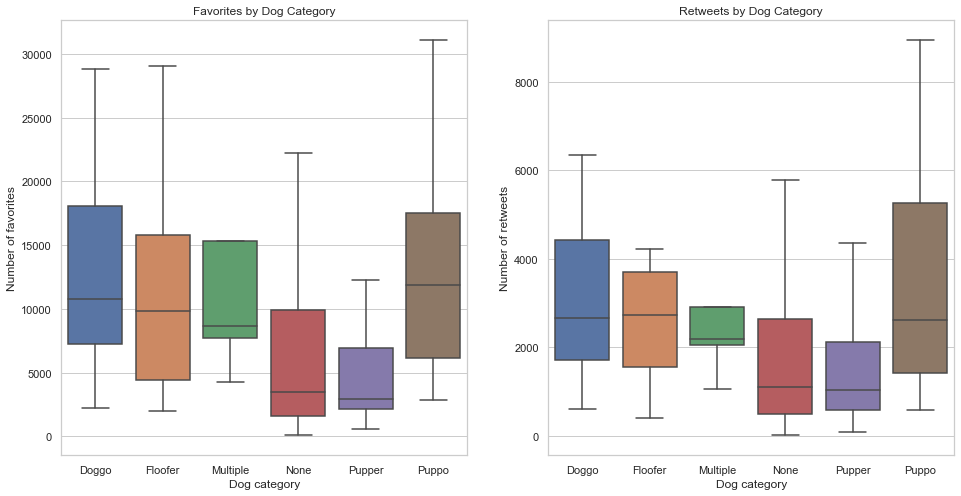

In [98]:
fig, (ax,ax1) = plt.subplots(1,2, figsize=(16,8))

sns.boxplot(data=twitter_archive_master, x='dog_category', y='favorites', ax=ax, showfliers=False)
ax.set_xticklabels(['Doggo', 'Floofer', 'Multiple', 'None', 'Pupper', 'Puppo'])
ax.set_title('Favorites by Dog Category')
ax.set_ylabel('Number of favorites')
ax.set_xlabel('Dog category')

sns.boxplot(data=twitter_archive_master, x='dog_category', y='retweets', ax=ax1, showfliers=False)
ax1.set_xticklabels(['Doggo', 'Floofer', 'Multiple', 'None', 'Pupper', 'Puppo'])
ax1.set_title('Retweets by Dog Category')
ax1.set_ylabel('Number of retweets')
ax1.set_xlabel('Dog category');

For the boxplots above, we ignored the outliers in the dataset to focus on the median and interquartile range.

The best performing category would be Puppo, with the highest median favorites and although Puppo has a similar retweet median to the Doggo and Floofer categories, the Puppo category is right skewed and has a much higher upper quartile than the other categories.

The median favorites and retweets for both Doggo and Floofer are very close, with Doggo being slightly ahead. For favorites, doggo has a slightly higher median and similar distribution as Floofer. For the number of retweets, Floofer has a slightly higher median value than Doggo, but Doggo has a wider distribution with a upper quartile which is higher than any Floofer retweet value.

Dogs with multiple categories come in fourth in terms of median number of favorites and retweets.

The uncategorised dogs come in fifth in terms of retweets and favorites with slightly higher median value and distribution  than Pupper.

Finally, The Pupper category is the worst performing category with the least amounts of favorites and retweets. 

Overall, it seems that the distribution of retweets and favorites appear to share similarities, which is not too surprising. Interestingly, the distribution of dog rating, shows some similarities with the favorites and retweets, so let look into that.


***
#### Question 3:Do highest rated dogs have the highest favourites and retweets?

In [67]:
twitter_archive_master['intercept'] = 1

mod = sm.OLS(twitter_archive_master['retweets'], twitter_archive_master[['intercept','rating_numerator']])
results = mod.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               retweets   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     166.9
Date:                Sat, 26 Jun 2021   Prob (F-statistic):           1.23e-36
Time:                        05:50:05   Log-Likelihood:                -18149.
No. Observations:                1866   AIC:                         3.630e+04
Df Residuals:                    1864   BIC:                         3.631e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept        -3599.1351    472.343     -7.620      0.000   -4525.512   -2672.758
rating_numerator   565.5098     43.770     12.920      0.000     479.666     651.353
==============================================================================
Omnibus:                     2536.417   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           634454.742
Skew:                           7.561   Prob(JB):                         0.00
Kurtosis:                      92.059   Cond. No.                         54.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the linear regression above, the p-value of 0 suggests that there is evidence that the ratings have a significant relationship between rating and the number of retweets. The R-squared value of 8.2% suggests a weak positive relationship between the variables and that the rating value affects 8.2% of the variance in number of retweets.

In [68]:
twitter_archive_master['intercept'] = 1

mod = sm.OLS(twitter_archive_master['favorites'], twitter_archive_master[['intercept','rating_numerator']])
results = mod.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              favorites   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     321.3
Date:                Sat, 26 Jun 2021   Prob (F-statistic):           2.09e-66
Time:                        05:50:05   Log-Likelihood:                -19996.
No. Observations:                1866   AIC:                         4.000e+04
Df Residuals:                    1864   BIC:                         4.001e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept        -1.417e+04   1270.450    -11.156      0.000   -1.67e+04   -1.17e+04
rating_numerator  2110.0980    117.727     17.924      0.000    1879.207    2340.989
==============================================================================
Omnibus:                     1845.893   Durbin-Watson:                   1.561
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           112826.922
Skew:                           4.674   Prob(JB):                         0.00
Kurtosis:                      39.929   Cond. No.                         54.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the linear regression above, the p-value of 0 suggests that there is evidence that the ratings have a significant relationship between rating and the number of favorites. The R-squared value of 14.7% suggests a weak positive relationship between the variables and that rating value affects 14.7% of the variance in number of favorites.